In [9]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the dataset
dataset_path = "C:/DeepBeat/data/features_30_sec.csv"  # Adjust the path if needed
df = pd.read_csv(dataset_path)

# Display the first few rows of the dataset
print(df.head())

# Display dataset info
print(df.info())


          filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0  blues.00000.wav  661794          0.350088         0.088757  0.130228   
1  blues.00001.wav  661794          0.340914         0.094980  0.095948   
2  blues.00002.wav  661794          0.363637         0.085275  0.175570   
3  blues.00003.wav  661794          0.404785         0.093999  0.141093   
4  blues.00004.wav  661794          0.308526         0.087841  0.091529   

    rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.002827             1784.165850          129774.064525   
1  0.002373             1530.176679          375850.073649   
2  0.002746             1552.811865          156467.643368   
3  0.006346             1070.106615          184355.942417   
4  0.002303             1835.004266          343399.939274   

   spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0              2002.449060            85882.761315  ...   52.420910   
1              2039.036516        

In [10]:
# Encode the genre labels
encoder = LabelEncoder()
df['label_encoded'] = encoder.fit_transform(df['label'])

# Display the mapping between labels and encoded values
print("Label Mapping:", dict(zip(encoder.classes_, range(len(encoder.classes_)))))

# Verify encoding
print(df[['label', 'label_encoded']].head())


Label Mapping: {'blues': 0, 'classical': 1, 'country': 2, 'disco': 3, 'hiphop': 4, 'jazz': 5, 'metal': 6, 'pop': 7, 'reggae': 8, 'rock': 9}
   label  label_encoded
0  blues              0
1  blues              0
2  blues              0
3  blues              0
4  blues              0


In [11]:


# Separate features and labels
X = df.drop(columns=["filename", "length", "label", "label_encoded"])  # Drop unnecessary columns
y = df["label_encoded"]  # Use the encoded labels

# Verify the shapes
print(f"Features shape: {X.shape}")
print(f"Labels shape: {y.shape}")


Features shape: (1000, 57)
Labels shape: (1000,)


In [12]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Verify the split
print(f"Training set: {X_train.shape}")
print(f"Testing set: {X_test.shape}")


Training set: (800, 57)
Testing set: (200, 57)


In [13]:
# Normalize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform on training data
X_test_scaled = scaler.transform(X_test)       # Transform on testing data

# Verify the shapes of scaled data
print(f"Scaled Training Features: {X_train_scaled.shape}")
print(f"Scaled Testing Features: {X_test_scaled.shape}")


Scaled Training Features: (800, 57)
Scaled Testing Features: (200, 57)


In [14]:
# Save the preprocessed training and testing data to CSV files
X_train_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_train_df['label'] = y_train.values
X_train_df.to_csv("C:/DeepBeat/data/X_train_scaled.csv", index=False)

X_test_df = pd.DataFrame(X_test_scaled, columns=X.columns)
X_test_df['label'] = y_test.values
X_test_df.to_csv("C:/DeepBeat/data/X_test_scaled.csv", index=False)

print("Preprocessed data saved to CSV files.")


Preprocessed data saved to CSV files.


In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import pandas as pd


In [16]:
# Load the preprocessed training and testing data
X_train = pd.read_csv("C:/DeepBeat/data/X_train_scaled.csv").drop(columns=["label"])
y_train = pd.read_csv("C:/DeepBeat/data/X_train_scaled.csv")["label"]

X_test = pd.read_csv("C:/DeepBeat/data/X_test_scaled.csv").drop(columns=["label"])
y_test = pd.read_csv("C:/DeepBeat/data/X_test_scaled.csv")["label"]

print(f"Training Data Shape: {X_train.shape}, {y_train.shape}")
print(f"Testing Data Shape: {X_test.shape}, {y_test.shape}")


Training Data Shape: (800, 57), (800,)
Testing Data Shape: (200, 57), (200,)


In [17]:
# Convert labels to one-hot encoding
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

print(f"Encoded Training Labels Shape: {y_train_encoded.shape}")
print(f"Encoded Testing Labels Shape: {y_test_encoded.shape}")


Encoded Training Labels Shape: (800, 10)
Encoded Testing Labels Shape: (200, 10)


In [18]:
# Build the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(y_train_encoded.shape[1], activation='softmax')  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()


C:\Users\PRANSHU\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         7,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,330 (63.79 KB)

 Trainable params: 16,330 (63.79 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# Train the model
history = model.fit(X_train, y_train_encoded, validation_split=0.2, epochs=30, batch_size=32, verbose=1)


Epoch 1/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1391 - loss: 2.4136 - val_accuracy: 0.3625 - val_loss: 1.9444
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2906 - loss: 1.9195 - val_accuracy: 0.4437 - val_loss: 1.6652
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4271 - loss: 1.6777 - val_accuracy: 0.4688 - val_loss: 1.4786
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4861 - loss: 1.4707 - val_accuracy: 0.5063 - val_loss: 1.3601
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5090 - loss: 1.3591 - val_accuracy: 0.5188 - val_loss: 1.2729
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5906 - loss: 1.2205 - val_accuracy: 0.5500 - val_loss: 1.2089
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5750 - loss: 1.1948 - val_accuracy: 0.5562 - val_loss: 1.1726
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6080 - loss: 1.0811 - val_accuracy: 0.5688 - val_loss:

In [20]:
# Evaluate the model on the testing set
test_loss, test_acc = model.evaluate(X_test, y_test_encoded, verbose=0)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


Test Accuracy: 72.50%


In [21]:
model.save("C:/DeepBeat/models/music_genre_ann.h5")
print("Model saved successfully.")


Model saved successfully.


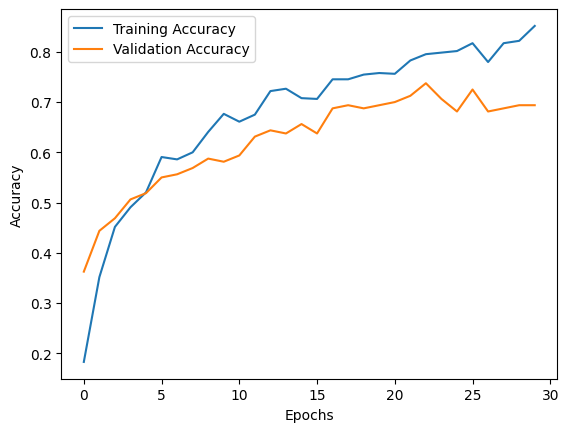

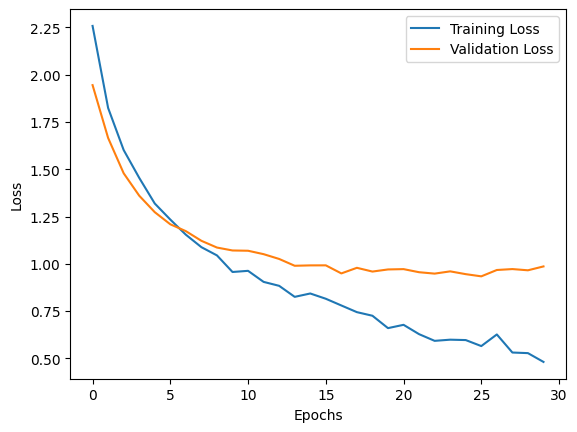

In [22]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
